In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("E:\Data Scientist\heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.groupby('sex').mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.12500,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966,0.449275


In [5]:
df.isna().values.any().sum()

0

In [6]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

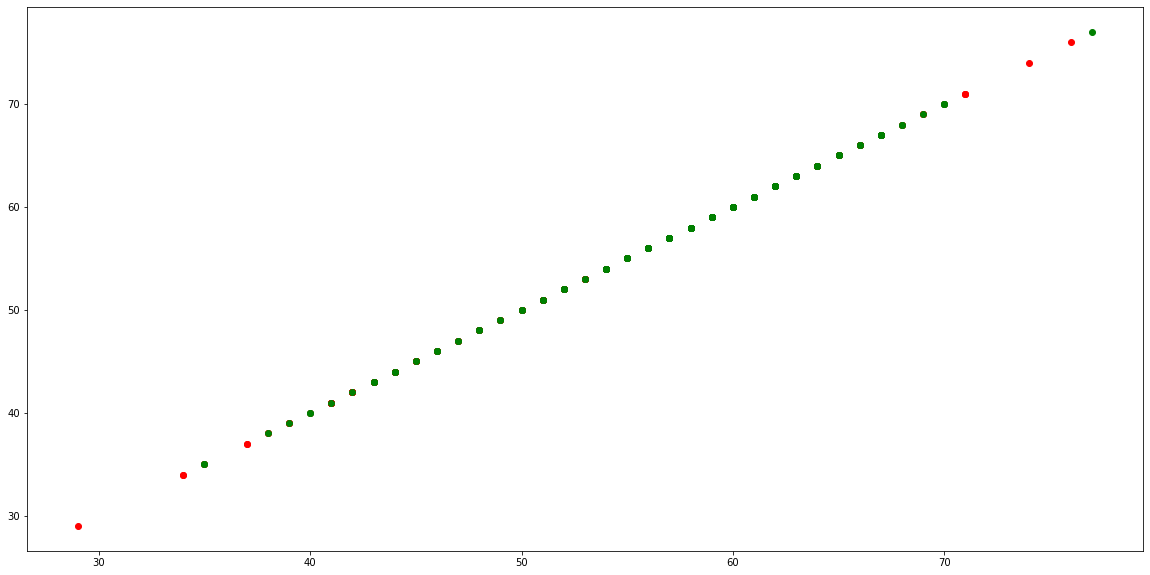

In [42]:
df_death=df[df['target']==1]
df_live=df[df['target']==0]
df_death
#import matplotlib
plt.rcParams['figure.figsize']=(20,10)
plt.scatter(df_death.age,df_death.age, color='red')
plt.scatter(df_live.age,df_live.age, color='green')
plt.show()

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr_model=LinearRegression()

In [48]:
x=df.drop('target', axis='columns')
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,df.target,test_size=0.2)

In [50]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [51]:
lr_model.score(x_test, y_test)

0.5396201153463205

In [ ]:
# It's quite obous that we did't get better result for linesr regression it's classification so we can use classification models

In [54]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'Decision_Tree': {
        'model': DecisionTreeClassifier(),
        'params' : {
            
        }  
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params' : {
            
        }  
    },
    'naive_bayes':{
        'model':MultinomialNB(),
        'params':{
            
        }
    }
}

In [55]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train_count,y_train)
    return model.score(x_test_count, y_test)

In [56]:
scores = []
from sklearn.model_selection import GridSearchCV
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score

,model,best_score,best_params
0,svm,0.834439,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.768282,{'n_estimators': 10}
2,logistic_regression,0.842857,{'C': 1}
3,Decision_Tree,0.747789,{}
4,KNN,0.619813,{}
5,naive_bayes,0.735459,{}
